<a href="https://colab.research.google.com/github/Gajalakshmi993/Harvard_Project/blob/main/Diamond3_Encode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = r"/content/drive/MyDrive/diamond_preprocess.csv"
df = pd.read_csv(file_path)
df.head()

,carat,cut,color,clarity,Total_depth_Percentage,table,price,volume,dimension_ratio,carat_category
0,0.479583,Ideal,E,SI2,61.50,55.0,5.789960,38.202030,1.631687,Light
1,0.458258,Premium,E,SI1,59.80,61.0,5.789960,34.505856,1.673160,Light
2,0.479583,Good,E,VS1,58.75,63.5,5.793014,38.076885,1.757576,Light
3,0.538516,Premium,I,VS2,62.40,58.0,5.814131,46.724580,1.602662,Medium
4,0.556776,Good,J,SI2,63.30,58.0,5.817111,51.917250,1.580000,Medium


##Encoding

In [7]:
df.select_dtypes(include=['object']).columns

Index(['cut', 'color', 'clarity', 'carat_category'], dtype='object')

In [8]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

cut = ['Premium', 'Ideal', 'Very Good', 'Good', 'Fair']

# Define Encoder with Custom Order
ordinal_encoder = OrdinalEncoder(categories=[cut])

# Fit and Transform
df['cut'] = ordinal_encoder.fit_transform(df[['cut']])

df['cut'] = df['cut'].astype(int)

In [9]:
df['cut'].unique()

array([1, 0, 3, 2, 4])

In [10]:
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

# Define Encoder with Custom Order
ordinal_encoder = OrdinalEncoder(categories=[color])

# Fit and Transform
df['color'] = ordinal_encoder.fit_transform(df[['color']])

df['color'] = df['color'].astype(int)

In [11]:
df['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [12]:
carat_category = ["Light", "Medium", "Heavy"]

oe = OrdinalEncoder(categories=[carat_category])

df['carat_category'] = oe.fit_transform(df[['carat_category']])


In [13]:
df['carat_category'] = df['carat_category'].astype(int)

In [14]:
df['carat_category'].unique()

array([0, 1])

In [15]:
clarity = ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

le = LabelEncoder()
df['clarity'] = le.fit_transform(df['clarity'])

In [16]:
df['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carat                   53940 non-null  float64
 1   cut                     53940 non-null  int64  
 2   color                   53940 non-null  int64  
 3   clarity                 53940 non-null  int64  
 4   Total_depth_Percentage  53940 non-null  float64
 5   table                   53940 non-null  float64
 6   price                   53940 non-null  float64
 7   volume                  53940 non-null  float64
 8   dimension_ratio         53940 non-null  float64
 9   carat_category          53940 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


##Model building

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


##Evaluation Metrices

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2

In [20]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_metrics = evaluate_model(lr, X_train, X_test, y_train, y_test)

In [21]:
#DecisionTree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt_metrics = evaluate_model(dt, X_train, X_test, y_train, y_test)


In [22]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_metrics = evaluate_model(rf, X_train, X_test, y_train, y_test)


In [23]:
#XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_metrics = evaluate_model(xgb, X_train, X_test, y_train, y_test)


In [24]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
knn_metrics = evaluate_model(knn, X_train, X_test, y_train, y_test)


In [25]:
results = {
    'Linear Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'KNN': knn_metrics
}

results_df = pd.DataFrame(
    results,
    index=['MAE', 'MSE', 'RMSE', 'R2']
).T

results_df.sort_values(by='R2', ascending=False)


,MAE,MSE,RMSE,R2
XGBoost,0.072407,0.009490,0.097416,0.990789
Random Forest,0.081919,0.012527,0.111924,0.987842
Decision Tree,0.103693,0.021102,0.145266,0.979519
KNN,0.118883,0.026694,0.163383,0.974092
Linear Regression,0.161743,0.046174,0.214881,0.955185


##ANN model

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])

ann.compile(
    optimizer='adam',
    loss='mse'
)

ann.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=0
)


In [28]:
y_pred_ann = ann.predict(X_test_scaled).flatten()

ann_mae = mean_absolute_error(y_test, y_pred_ann)
ann_mse = mean_squared_error(y_test, y_pred_ann)
ann_rmse = np.sqrt(ann_mse)
ann_r2 = r2_score(y_test, y_pred_ann)


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
#Saving the best model

import pickle

with open("best_diamond_price_model.pkl", "wb") as file:
    pickle.dump(xgb, file)

In [30]:
#scalar
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


##Cluster Model

In [31]:
features = [
    'carat', 'volume', 'Total_depth_Percentage', 'table',
    'cut', 'color', 'clarity', 'price'
]

cluster_df = df[features].copy()


In [32]:
#Standard Scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)


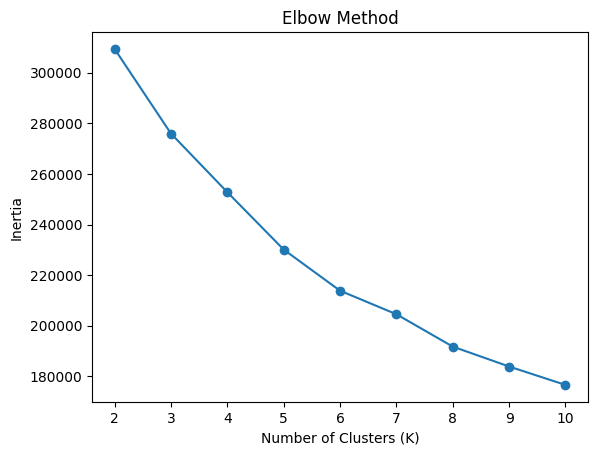

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [34]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(cluster_scaled)
    score = silhouette_score(cluster_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.261
K=3, Silhouette Score=0.239
K=4, Silhouette Score=0.178
K=5, Silhouette Score=0.182
K=6, Silhouette Score=0.175


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_scaled)

df['cluster'] = cluster_labels


In [ ]:
#DBScan
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)
db_labels = dbscan.fit_predict(cluster_scaled)

df['dbscan_cluster'] = db_labels


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(cluster_scaled)

df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]


ValueError: Could not interpret value `kmeans_cluster` for `hue`. An entry with this name does not appear in `data`.

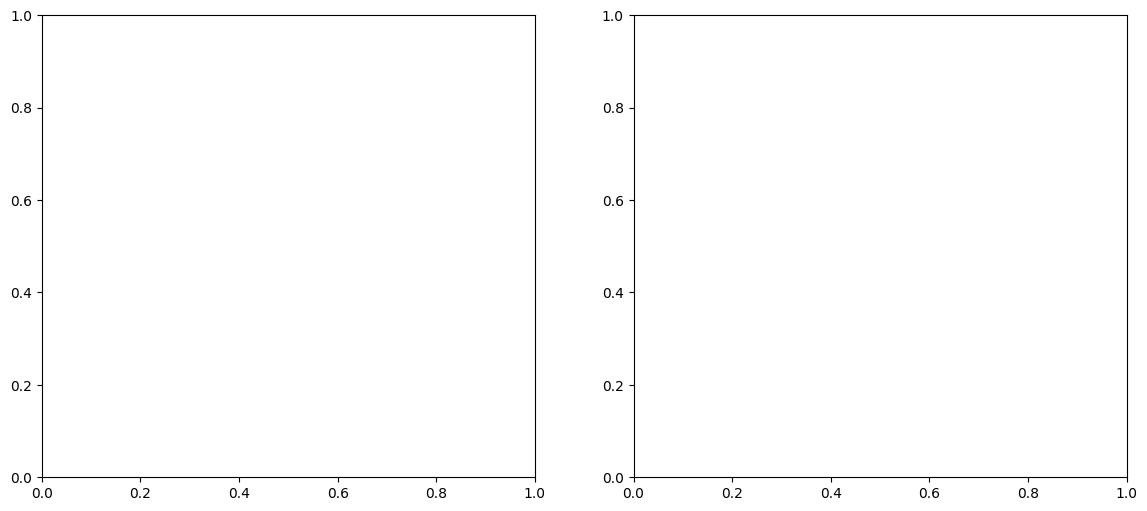

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KMeans plot
sns.scatterplot(
    x='PC1', y='PC2',
    hue='kmeans_cluster',
    data=df,
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title('KMeans Clustering (PCA Projection)')

# DBSCAN plot
sns.scatterplot(
    x='PC1', y='PC2',
    hue='dbscan_cluster',
    data=df,
    palette='tab10',
    ax=axes[1]
)
axes[1].set_title('DBSCAN Clustering (PCA Projection)')

plt.tight_layout()
plt.show()


In [ ]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd


In [ ]:
# Load models
with open("best_diamond_price_model.pkl", "rb") as f:
    price_model = pickle.load(f)

with open("kmeans_cluster_model.pkl", "rb") as f:
    cluster_model = pickle.load(f)

with open("cluster_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("ordinal_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)


In [ ]:
st.set_page_config(page_title="Diamond Price & Market Segment", layout="centered")

st.title("💎 Diamond Price Prediction & Market Segmentation")
st.markdown("Enter diamond attributes to predict **price** and **market category**")


In [ ]:
carat = st.number_input("Carat", min_value=0.1, max_value=5.0, value=1.0)
depth = st.number_input("Depth", value=61.5)
table = st.number_input("Table", value=57.0)

x = st.number_input("Length (x)", value=6.5)
y = st.number_input("Width (y)", value=6.5)
z = st.number_input("Height (z)", value=4.0)

volume = x * y * z

cut = st.selectbox("Cut", ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
color = st.selectbox("Color", ['J', 'I', 'H', 'G', 'F', 'E', 'D'])
clarity = st.selectbox("Clarity", ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])


In [ ]:
input_df = pd.DataFrame({
    'carat': [carat],
    'depth': [Total_depth_percentage],
    'table': [table],
    'volume': [volume],
    'cut': [cut],
    'color': [color],
    'clarity': [clarity]
})


In [ ]:
input_df[['cut', 'color', 'clarity']] = encoder.transform(
    input_df[['cut', 'color', 'clarity']]
)


In [ ]:
if st.button("🔮 Predict"):
    predicted_price = price_model.predict(input_df)[0]


In [ ]:
st.subheader("💰 Predicted Diamond Price")
st.success(f"₹ {predicted_price:,.2f}")


In [ ]:
scaled_input = scaler.transform(input_df)
cluster_id = cluster_model.predict(scaled_input)[0]


In [ ]:
cluster_names = {
    0: "Budget Segment 💵",
    1: "Mid-Range Segment 💎",
    2: "Premium Segment 👑",
    3: "Luxury Segment 🏆"
}

cluster_insights = {
    0: "Smaller diamonds with basic cuts, affordable pricing.",
    1: "Balanced diamonds with good quality and value.",
    2: "High-quality diamonds with better clarity and cut.",
    3: "Top-tier diamonds with excellent size and brilliance."
}


In [ ]:
st.subheader("📊 Market Segment")
st.info(cluster_names.get(cluster_id, "Unknown Segment"))
st.write(cluster_insights.get(cluster_id, ""))
st.markdown("📌 *This diamond belongs to a specific market segment based on size, quality, and pricing patterns learned from historical data.*")
